<a href="https://colab.research.google.com/github/ane-schow/oceanografia/blob/main/Perfil_salinidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gerar um perfil de salinidade da foz do rio amazonas

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [ ]:
fn = '/content/perfil so amazonia.nc'
dataset = xr.open_dataset(fn)
dataset.info()
sq_fns = np.squeeze(dataset)

Extrair variáveis

In [3]:
lat = sq_fns['latitude']
lon = sq_fns['longitude']
prof = sq_fns['depth']
sal = dataset['so'].isel(time=0, depth=slice(0,50),latitude=0, longitude=slice(0,162))
print(sal.dims)

('depth', 'longitude')


Plotar gráfico com eixos como latitude ou longitude

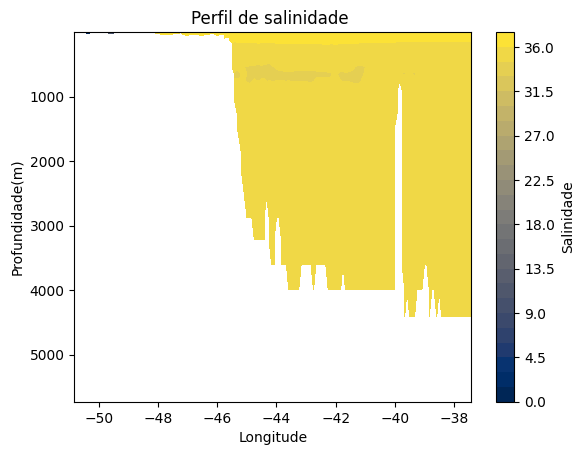

In [4]:
fig = plt.figure()
ax = plt.gca()
cntr = plt.contourf(lon, prof, sal, levels=25,cmap='cividis')
c = plt.colorbar(cntr, ax=ax)
c.set_label('Salinidade')

ax.invert_yaxis()
plt.xlabel('Longitude')
plt.ylabel('Profundidade(m)')
plt.title('Perfil de salinidade ')
plt.show()